In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bfro_locations.csv')
df.head()

,number,title,classification,timestamp,latitude,longitude
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.5000,-142.9000
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.1872,-132.7982
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.2035,-132.8202
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.9375,-141.5667
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.0595,-149.7853


In [3]:
#using first 4 characters in col timestamp, filter 2024
df[df.timestamp.str[:4] == '2023']

,number,title,classification,timestamp,latitude,longitude
65,75577,"Report 75577: Daylight sighting, 2 witnesses, ...",Class A,2023-02-09T12:00:00Z,33.65175,-85.52335
3509,75464,Report 75464: Multiple witness daylight motori...,Class B,2023-02-28T12:00:00Z,39.40836,-84.10006


In [4]:
# create col year from first 4 characters in col timestamp
df['year'] = df.timestamp.str[:4]
df.head()

,number,title,classification,timestamp,latitude,longitude,year
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.5000,-142.9000,2000
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.1872,-132.7982,1995
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.2035,-132.8202,2004
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.9375,-141.5667,2004
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.0595,-149.7853,2004


In [11]:
# export df as csv
df.to_csv('bfro_locations_year.csv', index=False)

<Axes: xlabel='year'>

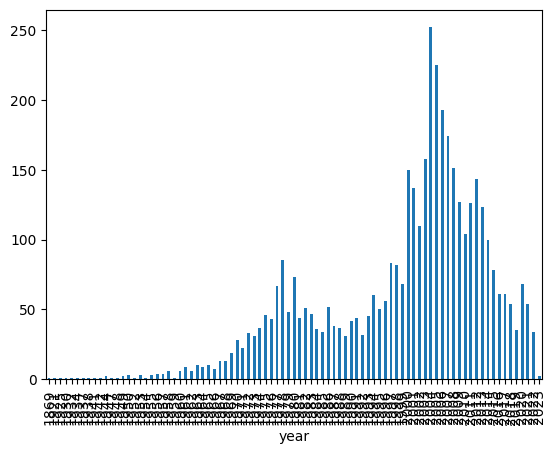

In [5]:
#plot bar chart of sightings per year
df.year.value_counts().sort_index().plot(kind='bar')

In [6]:
# year with most sightings
df.year.value_counts().idxmax()

'2004'

In [7]:
# number of rows in df
df.shape

(4309, 7)

In [8]:
# min and max for year
df.year.min(), df.year.max()

('1869', '2023')

In [9]:
# count of sightings per year
df.year.value_counts().sort_index()

year
1869     1
1921     1
1925     1
1930     1
1932     1
        ..
2019    35
2020    68
2021    54
2022    34
2023     2
Name: count, Length: 87, dtype: int64

In [10]:
#sightings in 1869
df[df.year == '1869']

,number,title,classification,timestamp,latitude,longitude,year
215,14338,Report 14338: Old newspaper article (Titusvill...,Class A,1869-11-10T12:00:00Z,37.39555,-121.4871,1869


In [17]:
import geocoder

In [35]:
#mapbox key
mapbox_key = 'pk.eyJ1IjoiZGxhaXUiLCJhIjoiY2xwc3NyYnMzMDZndDJqcGcxaWp4bzRpaSJ9.J-Sw1uGqDwm_PB9wLZqHug'

In [27]:
latlng = [45.3, -105.1]
g = geocoder.mapbox(latlng, method='reverse', key='pk.eyJ1IjoiZGxhaXUiLCJhIjoiY2xwc3NyYnMzMDZndDJqcGcxaWp4bzRpaSJ9.J-Sw1uGqDwm_PB9wLZqHug')

In [61]:
states = []

In [56]:
import time

In [58]:
def add_state_column(df, lat_col, lon_col):
    """
    Adds a 'State' column to the DataFrame based on latitude and longitude.
    Includes error handling for failed geocoding requests.

    Parameters:
    - df: DataFrame with latitude and longitude columns.
    - lat_col: The name of the column containing latitude values.
    - lon_col: The name of the column containing longitude values.

    Returns:
    - DataFrame with an additional 'State' column.
    """
    # states = []
    for _, row in df.iterrows():
        try:
            lat, lon = row[lat_col], row[lon_col]
            # Perform reverse geocoding using Mapbox
            g = geocoder.mapbox([lat, lon], method='reverse', key=mapbox_key)
            # Check if the response is valid and contains JSON data
            print(row['number'])
            if g.json:
                state = g.json.get('state', 'State not found')
            else:
                state = 'State not found'
        except Exception as e:
            print(f"Error while geocoding: {e}")
            state = 'Error'
        states.append(state)

        # Respect the API's rate limit by pausing for 0.5 seconds between requests
        time.sleep(0.5)
    
    # Add the 'State' column to the DataFrame
    df['State'] = states
    return df

# Example usage
# Replace 'latitude' and 'longitude' with your actual column names
# df = pd.DataFrame({
#     'latitude': [40.7128, 34.0522],
#     'longitude': [-74.0060, -118.2437]
# })

# Updated DataFrame with 'State' column
# new_df = add_state_column(df, 'latitude', 'longitude')
# print(new_df)


In [33]:
df_test = df.head()

In [59]:
add_state_column(df_test, 'latitude', 'longitude')
df_test

637
2917
7963
9317
13038


/var/folders/st/3g_y2gzx2qlcw80sfz6hkjk00000gn/T/ipykernel_35282/1456362111.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State'] = states


,number,title,classification,timestamp,latitude,longitude,year,State
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.5000,-142.9000,2000,Alaska
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.1872,-132.7982,1995,Alaska
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.2035,-132.8202,2004,Alaska
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.9375,-141.5667,2004,Alaska
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.0595,-149.7853,2004,Alaska


In [62]:
add_state_column(df, 'latitude', 'longitude')
df

637
2917
7963
9317
13038
23666
26604
75309
179
245
416
435
451
577
799
832
961
1022
1907
3028
3296
4743
5954
6938
7031
7235
7427
8171
8679
10498
14082
15102
17455
17480
18043
22539
24646
25238
25559
26513
26886
27067
27459
27480
27568
33307
35293
35475
37038
37094
39383
40417
40912
42939
43689
44487
44849
44986
45296
45464
46746
47975
50178
65679
67423
75577
186
1636
1637
1640
1641
1944
2494
2774
2931
2957
3226
3519
4090
4093
4094
5228
5316
5607
6178
6932
7045
7234
7815
7971
8420
8527
8913
9507
9753
10913
10919
11430
11632
13211
13718
13983
16696
24254
26100
27482
27948
29417
36178
36498
38015
40020
40101
41827
46380
50541
55376
55410
56108
56735
56954
57471
59736
62340
62625
62678
62851
63860
63984
440
3482
6552
7495
7566
8685
11514
16580
17448
17804
18723
19339
23136
23358
24405
27495
28946
29358
42364
47536
69323
83
147
353
528
615
849
865
868
875
913
919
1055
1068
1090
1229
1301
1391
1473
1510
1653
1919
2794
2886
2896
2928
3169
3421
3672
4446
4630
4946
6429
6521
6639
6746
6961
6963

,number,title,classification,timestamp,latitude,longitude,year,State
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.50000,-142.90000,2000,Alaska
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.18720,-132.79820,1995,Alaska
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.20350,-132.82020,2004,Alaska
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.93750,-141.56670,2004,Alaska
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.05950,-149.78530,2004,Alaska
...,...,...,...,...,...,...,...,...
4304,4159,Report 4159: Campers hear unusual grunting sou...,Class C,1995-11-15T12:00:00Z,31.22333,-94.96611,1995,Texas
4305,175,Report 175: Campers encounter large animal nea...,Class C,2000-07-30T12:00:00Z,47.47745,-121.04150,2000,Washington
4306,945,Report 945: Creature with red glowing eyes seen,Class C,1999-03-19T12:00:00Z,47.57778,-124.29330,1999,Washington
4307,1387,Report 1387: Father and son hear heavy footste...,Class C,1983-08-17T12:00:00Z,47.51030,-122.04560,1983,Washington


In [63]:
len(states)

4309

In [64]:
#export df as csv
df.to_csv('bfro_locations_states.csv', index=False)

In [118]:
# unique states values counts
df_states = df.State.value_counts()
df_states


State
Washington          547
Ohio                286
Florida             283
California          281
Texas               218
Illinois            211
Oregon              189
Michigan            161
Missouri            140
Georgia             121
Colorado            108
Arkansas            102
Kentucky            100
West Virginia        92
Alabama              88
British Columbia     86
Oklahoma             81
North Carolina       81
Virginia             79
Wisconsin            78
Idaho                74
Arizona              65
Tennessee            63
New York             62
Pennsylvania         54
Montana              48
New Jersey           47
Utah                 45
Minnesota            44
Indiana              43
Iowa                 43
Kansas               39
Ontario              38
Louisiana            33
South Carolina       27
Alberta              27
New Mexico           24
Massachusetts        23
Mississippi          21
Connecticut          16
Nebraska             14
Alaska    

In [119]:
#export df_states
df_states.to_csv('bfro_locations_states_counts.csv')

In [69]:
len(df.State.unique())

60

In [70]:
df_full = pd.read_csv('bfro_reports_geocoded.csv')
df_full

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_intensity,precip_probability,precip_type,pressure,summary,conditions,uv_index,visibility,wind_bearing,wind_speed
0,I am not sure how relevant this report will be...,"We were on our way to Rapid City, so we were h...",Washakie County,Wyoming,Summer,NaN,NaN,NaN,NaN,798.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I don't know if what I saw was two bigfoots or...,"Heading to the deep mine Poca #2, the airshaft...",Wyoming County,West Virginia,Winter,Report 13237: Daylight sighting near an abando...,37.58135,-81.29745,2005-12-03,13237.0,...,0.204,100.0,"['rain', 'snow']",1018.7,Partly cloudy throughout the day with late aft...,"Snow, Rain, Partially cloudy",NaN,9.3,168.1,17.1
2,"My family and I went to Ludlow, Vermont for Co...",It's off Rt 100 outside of Ludlow Vermont. It ...,Windsor County,Vermont,Fall,Report 13285: Evening sighting by motorists on...,43.46540,-72.70510,2005-10-08,13285.0,...,3.208,100.0,['rain'],1011.8,Cloudy skies throughout the day with a chance ...,"Rain, Overcast",NaN,5.0,356.2,7.6
3,It was spring break 1984 and I was 16 at the t...,"Wythe county Virginia near Wytheville, looking...",Wythe County,Virginia,Spring,"Report 2285: Boy sees ""Bigfoot"" in the woods w...",37.22647,-81.09017,1984-04-08,2285.0,...,0.000,0.0,NaN,1020.9,Partly cloudy throughout the day.,Partially cloudy,NaN,13.0,107.3,11.5
4,It was the winter of 1996 and we were on our w...,"Hwy 182, Wood County Between Quitman, Texas an...",Wood County,Texas,Winter,Report 2048: Night time road crossing observation,32.79430,-95.54250,1996-12-22,2048.0,...,NaN,0.0,NaN,NaN,Partly cloudy throughout the day.,Partially cloudy,NaN,10.5,180.4,20.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5077,while camping protecting other equipment befor...,(withheld),Rio Arriba County,New Mexico,Summer,NaN,NaN,NaN,NaN,11992.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5078,I was on my way to work on a Saturday morning ...,"Laurel, Maryland. It was sighted off of Rt 19...",Prince George's County,Maryland,Spring,NaN,NaN,NaN,NaN,1171.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5079,On the twenty sixth and again on the twenty se...,"head n.on highway 441 from Orlando,then go eas...",Lake County,Florida,Summer,NaN,NaN,NaN,NaN,30267.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5080,I was hunting on me and my neighbor's property...,It was on my neighbor's property in the woods ...,White County,Illinois,Fall,NaN,NaN,NaN,NaN,59058.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#extract report number from the column title
df_full['report_number'] = df_full.title.str.extract(r'(\d+)')
df_full

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_probability,precip_type,pressure,summary,conditions,uv_index,visibility,wind_bearing,wind_speed,report_number
report_number,,,,,,,,,,,,,,,,,,,,,
NaN,I am not sure how relevant this report will be...,"We were on our way to Rapid City, so we were h...",Washakie County,Wyoming,Summer,NaN,NaN,NaN,NaN,798.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,I don't know if what I saw was two bigfoots or...,"Heading to the deep mine Poca #2, the airshaft...",Wyoming County,West Virginia,Winter,Report 13237: Daylight sighting near an abando...,37.58135,-81.29745,2005-12-03,13237.0,...,100.0,"['rain', 'snow']",1018.7,Partly cloudy throughout the day with late aft...,"Snow, Rain, Partially cloudy",NaN,9.3,168.1,17.1,13237
13285,"My family and I went to Ludlow, Vermont for Co...",It's off Rt 100 outside of Ludlow Vermont. It ...,Windsor County,Vermont,Fall,Report 13285: Evening sighting by motorists on...,43.46540,-72.70510,2005-10-08,13285.0,...,100.0,['rain'],1011.8,Cloudy skies throughout the day with a chance ...,"Rain, Overcast",NaN,5.0,356.2,7.6,13285
2285,It was spring break 1984 and I was 16 at the t...,"Wythe county Virginia near Wytheville, looking...",Wythe County,Virginia,Spring,"Report 2285: Boy sees ""Bigfoot"" in the woods w...",37.22647,-81.09017,1984-04-08,2285.0,...,0.0,NaN,1020.9,Partly cloudy throughout the day.,Partially cloudy,NaN,13.0,107.3,11.5,2285
2048,It was the winter of 1996 and we were on our w...,"Hwy 182, Wood County Between Quitman, Texas an...",Wood County,Texas,Winter,Report 2048: Night time road crossing observation,32.79430,-95.54250,1996-12-22,2048.0,...,0.0,NaN,NaN,Partly cloudy throughout the day.,Partially cloudy,NaN,10.5,180.4,20.8,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,while camping protecting other equipment befor...,(withheld),Rio Arriba County,New Mexico,Summer,NaN,NaN,NaN,NaN,11992.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,I was on my way to work on a Saturday morning ...,"Laurel, Maryland. It was sighted off of Rt 19...",Prince George's County,Maryland,Spring,NaN,NaN,NaN,NaN,1171.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,On the twenty sixth and again on the twenty se...,"head n.on highway 441 from Orlando,then go eas...",Lake County,Florida,Summer,NaN,NaN,NaN,NaN,30267.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# number of rows after dropping NaN values from title
df_full.title.dropna().shape

(4104,)

In [88]:
# drop rows with NaN values in report_number
df_full_2 = df_full.dropna(subset=['report_number'])

In [89]:
# add df_full['observed'] into df, using report_number as key
df_observed = df_full_2[['report_number', 'observed']]
df_observed


,report_number,observed
report_number,,
13237,13237,I don't know if what I saw was two bigfoots or...
13285,13285,"My family and I went to Ludlow, Vermont for Co..."
2285,2285,It was spring break 1984 and I was 16 at the t...
2048,2048,It was the winter of 1996 and we were on our w...
6496,6496,"While attending U.R.I in the Fall of 1974,I wo..."
...,...,...
26276,26276,I was hunting in the spring for turkey. I herd...
41995,41995,My sighting was 41 years ago at NW 21 Terr/NW ...
2566,2566,"Alachua County, Florida, around 1985 We lived ..."


In [90]:
# reset index column for df_observed
df_observed.reset_index(drop=True, inplace=True)
df_observed


,report_number,observed
0,13237,I don't know if what I saw was two bigfoots or...
1,13285,"My family and I went to Ludlow, Vermont for Co..."
2,2285,It was spring break 1984 and I was 16 at the t...
3,2048,It was the winter of 1996 and we were on our w...
4,6496,"While attending U.R.I in the Fall of 1974,I wo..."
...,...,...
4099,26276,I was hunting in the spring for turkey. I herd...
4100,41995,My sighting was 41 years ago at NW 21 Terr/NW ...
4101,2566,"Alachua County, Florida, around 1985 We lived ..."
4102,27076,I am subitting this true report for my Cousin ...


In [95]:
# transpose index column in df into a new column
df.reset_index(inplace=True)
df

,number,title,classification,timestamp,latitude,longitude,year,State
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.50000,-142.90000,2000,Alaska
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.18720,-132.79820,1995,Alaska
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.20350,-132.82020,2004,Alaska
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.93750,-141.56670,2004,Alaska
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.05950,-149.78530,2004,Alaska
...,...,...,...,...,...,...,...,...
4304,4159,Report 4159: Campers hear unusual grunting sou...,Class C,1995-11-15T12:00:00Z,31.22333,-94.96611,1995,Texas
4305,175,Report 175: Campers encounter large animal nea...,Class C,2000-07-30T12:00:00Z,47.47745,-121.04150,2000,Washington
4306,945,Report 945: Creature with red glowing eyes seen,Class C,1999-03-19T12:00:00Z,47.57778,-124.29330,1999,Washington
4307,1387,Report 1387: Father and son hear heavy footste...,Class C,1983-08-17T12:00:00Z,47.51030,-122.04560,1983,Washington


In [98]:
type(df['number'][0])

numpy.int64

In [100]:
#cast df_observed['report_number'] to int
df_observed['report_number'] = df_observed['report_number'].astype(int)

/var/folders/st/3g_y2gzx2qlcw80sfz6hkjk00000gn/T/ipykernel_35282/257714551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_observed['report_number'] = df_observed['report_number'].astype(int)


In [101]:
df_observed

,report_number,observed
0,13237,I don't know if what I saw was two bigfoots or...
1,13285,"My family and I went to Ludlow, Vermont for Co..."
2,2285,It was spring break 1984 and I was 16 at the t...
3,2048,It was the winter of 1996 and we were on our w...
4,6496,"While attending U.R.I in the Fall of 1974,I wo..."
...,...,...
4099,26276,I was hunting in the spring for turkey. I herd...
4100,41995,My sighting was 41 years ago at NW 21 Terr/NW ...
4101,2566,"Alachua County, Florida, around 1985 We lived ..."
4102,27076,I am subitting this true report for my Cousin ...


In [102]:
# left join on df and df_observed
df_merged = pd.merge(df, df_observed, left_on='number', right_on='report_number', how='left')
df_merged

,number,title,classification,timestamp,latitude,longitude,year,State,report_number,observed
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.50000,-142.90000,2000,Alaska,637.0,My hiking partner and I arrived late to the Ke...
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.18720,-132.79820,1995,Alaska,2917.0,"I was going for a drive. I had 3 kids with me,..."
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.20350,-132.82020,2004,Alaska,7963.0,This incident happened last night just after 1...
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.93750,-141.56670,2004,Alaska,9317.0,"My daughter and I were traveling to Tok, Alask..."
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.05950,-149.78530,2004,Alaska,13038.0,I and two of my friends were bored one night s...
...,...,...,...,...,...,...,...,...,...,...
4304,4159,Report 4159: Campers hear unusual grunting sou...,Class C,1995-11-15T12:00:00Z,31.22333,-94.96611,1995,Texas,4159.0,"During the deer hunting season of Nov., 1995 w..."
4305,175,Report 175: Campers encounter large animal nea...,Class C,2000-07-30T12:00:00Z,47.47745,-121.04150,2000,Washington,175.0,We were having a family reunion and on saturda...
4306,945,Report 945: Creature with red glowing eyes seen,Class C,1999-03-19T12:00:00Z,47.57778,-124.29330,1999,Washington,945.0,A mexican brush picker in this area was pickin...
4307,1387,Report 1387: Father and son hear heavy footste...,Class C,1983-08-17T12:00:00Z,47.51030,-122.04560,1983,Washington,1387.0,"One day during a hike through the woods, My fa..."


In [103]:
#export df_merged as csv
df_merged.to_csv('bfro_reports_geocoded_with_observed.csv', index=False)

In [106]:
# filter for reports between 2014 to 2024
df_recent = df_merged[(df_merged.year >= '2014') & (df_merged.year <= '2024')]
df_recent

,number,title,classification,timestamp,latitude,longitude,year,State,report_number,observed
7,75309,Report 75309: Daylight road crossing sighting ...,Class A,2022-05-15T12:00:00Z,61.96802,-145.34270,2022,Alaska,75309.0,This past spring at approximately mile 106 Ric...
55,44487,Report 44487: Memory told of a close dalylight...,Class A,2014-03-30T12:00:00Z,32.91874,-85.97930,2014,Alabama,44487.0,"Not a good writer, but what happened to me and..."
56,44849,Report 44849: Sightings at night in the same a...,Class A,2014-12-27T12:00:00Z,33.37095,-87.69420,2014,Alabama,44849.0,Was driving home at night about 9:00 pm. Turne...
57,44986,Report 44986: Memory told of a close up daylig...,Class A,2014-12-31T12:00:00Z,31.65100,-85.19265,2014,Alabama,44986.0,"When my aunt was about 11 or 12 years old, she..."
58,45296,Report 45296: Motorist observes a Bigfoot chas...,Class A,2014-06-09T12:00:00Z,34.00806,-86.96416,2014,Alabama,45296.0,"Saw a deer run across the road, right behind i..."
...,...,...,...,...,...,...,...,...,...,...
4238,71733,"Report 71733: Sighting, photos and video (dist...",Class B,2021-10-17T12:00:00Z,46.08392,-89.91314,2021,Wisconsin,71733.0,Wanted to pass this by you as I was out duck h...
4239,75457,Report 75457: Possible bigfoot whoops heard 60...,Class B,2022-09-17T12:00:00Z,46.09433,-91.16428,2022,Wisconsin,75457.0,Myself and two friends were on the dock night ...
4283,47225,Report 47225: Possible early morning sighting ...,Class B,2014-11-12T12:00:00Z,39.51256,-78.05424,2014,West Virginia,47225.0,I was driving to work at approximately 7:40 a....
4284,55554,Report 55554: Possible sighting by motorists h...,Class B,2016-09-06T12:00:00Z,38.18933,-80.25220,2016,West Virginia,55554.0,My wife and I were taking an evening drive on ...


In [108]:
# df_recent state value counts
df_recent.State.value_counts()

State
Washington          80
Ohio                43
Illinois            42
Texas               34
Missouri            28
Florida             24
Idaho               20
California          18
Michigan            14
Pennsylvania        13
Wisconsin           13
North Carolina      13
New York            12
Colorado            11
Virginia            11
Arkansas            11
Alabama             11
Massachusetts       10
New Jersey          10
Kentucky            10
Connecticut         10
Georgia              9
Maine                8
Minnesota            8
Oregon               8
Montana              7
West Virginia        6
Oklahoma             6
Kansas               5
South Carolina       5
Tennessee            5
Arizona              5
British Columbia     4
Indiana              4
Alberta              3
Iowa                 3
Utah                 3
New Hampshire        3
Louisiana            3
Error                2
Maryland             2
Vermont              2
Ontario              1
Nova 

In [109]:
#export df_recent as csv
df_recent.to_csv('bfro_reports_2014-2024.csv', index=False)

In [110]:
df_five_years = df_merged[(df_merged.year >= '2019') & (df_merged.year <= '2024')]
df_five_years

,number,title,classification,timestamp,latitude,longitude,year,State,report_number,observed
7,75309,Report 75309: Daylight road crossing sighting ...,Class A,2022-05-15T12:00:00Z,61.96802,-145.34270,2022,Alaska,75309.0,This past spring at approximately mile 106 Ric...
63,65679,Report 65679: Afternoon sighting of a bigfoot ...,Class A,2020-04-16T12:00:00Z,31.24305,-88.31126,2020,Alabama,65679.0,I was driving home from work in the afternoon ...
64,67423,Report 67423: Sighting of a Sasquatch crossing...,Class A,2020-06-15T12:00:00Z,33.64341,-85.41961,2020,Alabama,67423.0,Me and my wife and two girls were going to see...
65,75577,"Report 75577: Daylight sighting, 2 witnesses, ...",Class A,2023-02-09T12:00:00Z,33.65175,-85.52335,2023,Alabama,75577.0,My husband and I heard strange sounds for 2 ni...
149,69323,Report 69323: 20 miles east of Petrified Fores...,Class A,2021-06-10T12:00:00Z,35.17500,-109.25000,2021,Arizona,69323.0,Heading west on I-40 today at 0930 my wife and...
...,...,...,...,...,...,...,...,...,...,...
4190,74646,Report 74646: Recent activity heard over three...,Class B,2022-06-20T12:00:00Z,47.76061,-120.66810,2022,Washington,74646.0,We rented a cabin on River Road on the Wenatch...
4191,74793,Report 74793: RECENT (GOOD BET for a one-night...,Class B,2022-08-05T12:00:00Z,45.96282,-121.73460,2022,Washington,74793.0,Aug. 5th 2022 Aprox 2am? Forlorn Lakes Campsit...
4192,74973,"Report 74973: ""Ohio howls"" heard by campers 7 ...",Class B,2020-07-24T12:00:00Z,45.96700,-121.66250,2020,Washington,74973.0,We were camping at Peterson Prairie Campground...
4238,71733,"Report 71733: Sighting, photos and video (dist...",Class B,2021-10-17T12:00:00Z,46.08392,-89.91314,2021,Wisconsin,71733.0,Wanted to pass this by you as I was out duck h...


In [111]:
df_five_years.State.value_counts()

State
Washington          29
Ohio                21
California          11
Idaho                9
Florida              9
Texas                8
Missouri             7
Virginia             7
North Carolina       6
New York             6
South Carolina       5
Pennsylvania         5
Oklahoma             5
Maine                4
Wisconsin            4
Colorado             4
Arkansas             4
Alabama              4
Illinois             4
Michigan             3
Minnesota            3
Oregon               3
Connecticut          3
Tennessee            3
Georgia              3
Montana              3
Indiana              2
Utah                 2
British Columbia     2
Error                1
West Virginia        1
Massachusetts        1
New Mexico           1
Mississippi          1
Maryland             1
Alaska               1
Kentucky             1
Ontario              1
New Brunswick        1
New Jersey           1
Kansas               1
Arizona              1
South Dakota         1
Name:

In [112]:
#value counts for year
df_five_years.year.value_counts()

year
2020    68
2021    54
2019    35
2022    34
2023     2
Name: count, dtype: int64

In [113]:
df_2020 = df_five_years[df_five_years.year == '2020']
df_2020

,number,title,classification,timestamp,latitude,longitude,year,State,report_number,observed
63,65679,Report 65679: Afternoon sighting of a bigfoot ...,Class A,2020-04-16T12:00:00Z,31.24305,-88.31126,2020,Alabama,65679.0,I was driving home from work in the afternoon ...
64,67423,Report 67423: Sighting of a Sasquatch crossing...,Class A,2020-06-15T12:00:00Z,33.64341,-85.41961,2020,Alabama,67423.0,Me and my wife and two girls were going to see...
296,67413,Report 67413: Two motorists sighting of a sasq...,Class A,2020-12-25T12:00:00Z,49.89706,-117.37970,2020,British Columbia,NaN,NaN
530,67412,Report 67412: Couple observes a sasquatch YEST...,Class A,2020-12-26T12:00:00Z,30.60980,-86.49450,2020,Florida,67412.0,My husband and I were sitting in the woods hun...
786,65536,Report 65536: Father & daughter sighting in Ye...,Class A,2020-05-09T12:00:00Z,39.24841,-86.33011,2020,Indiana,65536.0,Me and my 11yr old daughter was spring turkey ...
...,...,...,...,...,...,...,...,...,...,...
4180,67472,Report 67472: Rock thrown at vehicle plus Clas...,Class B,2020-08-20T12:00:00Z,47.89745,-122.83450,2020,Washington,67472.0,"On August 20, 2020 in the evening about 8:10pm..."
4181,67585,Report 67585: Possible sighting of a gray Bigf...,Class B,2020-12-15T12:00:00Z,47.74207,-117.53020,2020,Washington,67585.0,I’m not sure what/if I saw. In December of 202...
4182,67619,Report 67619: Retired wildlife biologist repor...,Class B,2020-10-17T12:00:00Z,48.57989,-117.58880,2020,Washington,67619.0,"October 17th, a study at Radio Dome Parking lo..."
4189,74644,Report 74644: GOOD SPOT: Campers describe enco...,Class B,2020-07-15T12:00:00Z,47.38253,-121.26360,2020,Washington,74644.0,July of 2020 my girlfriend and I went camping ...


In [114]:
#export df_2020
df_2020.to_csv('bfro_reports_2020.csv', index=False)

In [116]:
#value counts for state
df_2020_states = df_2020.State.value_counts()
df_2020_states

State
Washington          13
Ohio                11
Idaho                4
Missouri             4
Maine                3
Alabama              2
New York             2
California           2
Arkansas             2
Texas                2
North Carolina       2
Oregon               2
Indiana              2
Massachusetts        1
Oklahoma             1
Pennsylvania         1
West Virginia        1
South Carolina       1
New Mexico           1
Ontario              1
Kentucky             1
Illinois             1
Colorado             1
British Columbia     1
Virginia             1
Montana              1
Minnesota            1
Michigan             1
Florida              1
Tennessee            1
Name: count, dtype: int64

In [117]:
#export df_2020_states
df_2020_states.to_csv('bfro_reports_2020_states.csv')

In [123]:
#df classification value counts
df_classifications = df.classification.value_counts()
df_classifications


classification
Class B    2176
Class A    2114
Class C      19
Name: count, dtype: int64

In [124]:
#export df_classifications
df_classifications.to_csv('bfro_reports_2020_classifications.csv')